In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the dataset with pandas
earthquake_raw = pd.read_csv('earthquake_data.csv')


In [ ]:
# Describe the dataset
print(earthquake_raw.describe())

In [13]:
# group by mag type to see unique values
earthquake_raw.groupby('magType').count()['mag']

magType
mb        992
mb_lg       7
md       3199
mh         11
ml       5994
mlr         4
mlv         1
mw          8
mwr        28
mww        90
Name: mag, dtype: int64

In [17]:
#-------------------------------------------
# Data Cleaning
#-------------------------------------------
# group by 'type' to see unique values
# I chose the id column because every row should have a unique id so that 
# would give me an acurate count of the number of rows in each group
earthquake_raw.groupby('type').count()['id'] 

# conclusion: choosing earthquakes to study I should remove all the other rows from the dataset
 
earthquake_iso = earthquake_raw[earthquake_raw['type'] == 'earthquake']
earthquake_iso.groupby('type').count()['id'] # check to see if the rows were removed

# conclusion: earthquake_iso is the new dataset that only includes earthquakes


type
earthquake    10145
Name: id, dtype: int64

In [18]:
#-------------------------------------------
# New Data Exploration
#-------------------------------------------
earthquake_iso.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10145.000000,10145.000000,10145.000000,10144.000000,8661.000000,8661.000000,6670.000000,10145.000000,7705.000000,10144.000000,8365.000000,8653.000000
mean,37.434758,-110.119316,20.120326,1.597582,23.866528,118.314526,0.964100,0.260649,1.807118,1.899384,0.276746,15.223391
std,18.715815,64.228604,49.278179,1.316655,22.170439,63.044366,3.126601,0.264173,3.224995,6.838656,0.519639,28.406674
min,-62.969400,-179.996400,-3.730000,-1.170000,0.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.183333,-150.463000,3.490000,0.730000,10.000000,71.000000,0.027580,0.100000,0.280000,0.480000,0.106000,4.000000
50%,38.316700,-119.994500,7.810000,1.300000,17.000000,101.000000,0.062984,0.150000,0.470000,0.790000,0.167000,7.000000
75%,46.888167,-110.807167,14.300000,2.050000,31.000000,155.000000,0.159875,0.330000,0.970000,1.540158,0.250000,16.000000
max,81.347900,179.975200,638.038000,7.600000,269.000000,350.000000,40.850000,2.470000,22.250000,431.600000,5.520000,645.000000


In [28]:
#-------------------------------------------
# Further cleaning by gap data
#-------------------------------------------
# for location and depth explorations I should remove gap values of larger than 180 degrees
# as according to the documentation the gap values larger that 180 degrees, represent 
# location and depth data that has large uncertainties. The smaller the number the more accurate. 
# lets remove those and then see the rest in a scatter plot. 

earthquake_gap_iso = earthquake_iso[earthquake_iso['gap'] < 180]


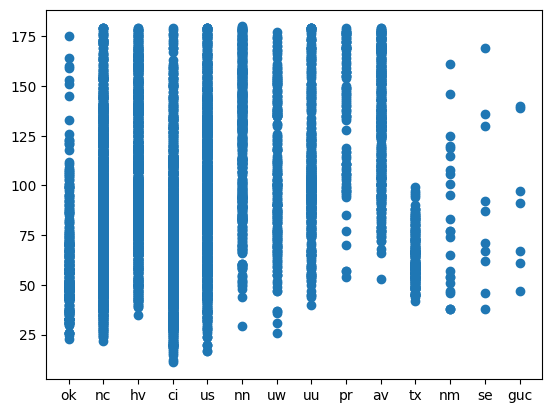

In [29]:

# plot the gap data in a scatter plot
plt.scatter(earthquake_gap_iso['magSource'], earthquake_gap_iso['gap'])